In [18]:
import pandas as pd
archivo = 'archivo_EN.csv'
df = pd.read_csv(archivo)

## Predicción

1- ¿Cuál es la antigüedad en la empresa que tendrá un empleado?

In [19]:
X = df[['Edad+norm', 'Género+norm', 'Rol de Trabajo+norm', 'Ingreso Mensual+norm', 'Balance Trabajo-Vida+norm', 'Satisfacción del Trabajo+norm', 'Desempeño+norm', 'Número de Promociones+norm', 'Horas Extras+norm', 'Distancia a Casa+norm', 'Nivel de Educación+norm', 'Estado Civil+norm', 'Número de Dependientes+norm', 'Nivel de Trabajo+norm', 'Tamaño de Empresa+norm', 'Meses desde el último evento+norm', 'Trabajo Remoto+norm', 'Oportunidades de Liderazgo+norm', 'Oportunidades de Innovación+norm', 'Reputación de la Empresa+norm', 'Reconocimiento a Empleado+norm', 'Deserción+norm']]
Y = df['Antigüedad en la Empresa+norm']

In [20]:
from sklearn.model_selection import train_test_split
X_trainAll, X_testAll, Y_trainAll, Y_testAll = train_test_split(X, Y, test_size=0.2, random_state=2)

In [21]:
print(X.shape, X_trainAll.shape, X_testAll.shape)

(62768, 22) (50214, 22) (12554, 22)


In [22]:
from sklearn.ensemble import RandomForestRegressor
modelAll = RandomForestRegressor()
modelAll.fit(X_trainAll, Y_trainAll)

RandomForestRegressor()

In [23]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = modelAll.predict(X_trainAll)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_trainAll, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_trainAll, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_trainAll, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.9441755554868174
Valor RMSE:  0.049378105482625015
Valor MAE:  0.030084992355436314


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
test_data_prediction = modelAll.predict(X_testAll)

In [25]:
r2_test = metrics.r2_score(Y_testAll, test_data_prediction)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_testAll, test_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_testAll, test_data_prediction)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.5974967786462488
Valor RMSE:  0.13248502988804028
Valor MAE:  0.08234649454314384


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
#Resultado esperado: 4 años
import numpy as np
from sklearn.preprocessing import MinMaxScaler

min_val = 0
max_val = 43

input_data = [59,1,0,5534,0,2,0,3,0,21,3,0,3,0,0,21,0,0,0,0,0,0]

# Convertir los valores a un array de numpy
values = np.array(input_data, dtype=float).reshape(-1, 1)

# Inicializar el normalizado
scaler = MinMaxScaler()

# Ajustar el escalador a los valores y luego transformarlos
values_normalized = scaler.fit_transform(values)

print("Valores originales:", values.flatten())
print("Valores normalizados:", values_normalized.flatten())

#Llevemos los datos de entrada a lo que espera nuestro algoritmo...
input_data_as_numpy_array = np.asarray(values_normalized)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Tomemos una decisión
prediction = modelAll.predict(input_data_reshaped)
x_original = prediction * (max_val - min_val) + min_val

print('Los años en los que estará en la empresa son: ', x_original)

Valores originales: [5.900e+01 1.000e+00 0.000e+00 5.534e+03 0.000e+00 2.000e+00 0.000e+00
 3.000e+00 0.000e+00 2.100e+01 3.000e+00 0.000e+00 3.000e+00 0.000e+00
 0.000e+00 2.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]
Valores normalizados: [1.06613661e-02 1.80701120e-04 0.00000000e+00 1.00000000e+00
 0.00000000e+00 3.61402241e-04 0.00000000e+00 5.42103361e-04
 0.00000000e+00 3.79472353e-03 5.42103361e-04 0.00000000e+00
 5.42103361e-04 0.00000000e+00 0.00000000e+00 3.79472353e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Los años en los que estará en la empresa son:  [16.6]


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Inicializar el modelo de Random Forest
rf = RandomForestRegressor(random_state=42)

# Definir el espacio de hiperparámetros a probar
param_dist = {
    'n_estimators': randint(50, 300),        # Número de árboles en el bosque
    'max_depth': randint(5, 50),             # Profundidad máxima del árbol
    'min_samples_split': randint(2, 20),     # Mínimo número de muestras necesarias para dividir un nodo
    'min_samples_leaf': randint(1, 20),      # Mínimo número de muestras necesarias en una hoja
    'max_features': ['auto', 'sqrt', 'log2'] # Número de características a considerar en cada división
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=50,                    # Número de combinaciones de hiperparámetros a probar
    cv=5,                          # Número de pliegues para validación cruzada
    scoring='neg_mean_absolute_error',  # Métrica de evaluación
    random_state=42,
    n_jobs=-1                      # Usa todos los núcleos disponibles
)

# Ajustar RandomizedSearchCV a los datos de entrenamiento
random_search.fit(X_trainAll, Y_trainAll)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores hiperparámetros encontrados:", best_params)
print("Mejor puntuación (MAE negativo):", best_score)

# Evaluar el mejor modelo en los datos de prueba
best_rf = random_search.best_estimator_
test_score = best_rf.score(X_testAll, Y_testAll)

print("Puntuación en los datos de prueba:", test_score)

c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\EDA Des

Mejores hiperparámetros encontrados: {'max_depth': 48, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 276}
Mejor puntuación (MAE negativo): -0.08977383743124447
Puntuación en los datos de prueba: 0.5926884135859407


3- ¿Cantidad de dependientes que tendrá un empleado?

In [29]:
X2 = df[['Edad+norm', 'Género+norm', 'Antigüedad en la Empresa+norm', 'Rol de Trabajo+norm', 'Ingreso Mensual+norm', 'Balance Trabajo-Vida+norm', 'Satisfacción del Trabajo+norm', 'Desempeño+norm', 'Número de Promociones+norm', 'Horas Extras+norm', 'Distancia a Casa+norm', 'Nivel de Educación+norm', 'Estado Civil+norm', 'Nivel de Trabajo+norm', 'Tamaño de Empresa+norm', 'Meses desde el último evento+norm', 'Trabajo Remoto+norm', 'Oportunidades de Liderazgo+norm', 'Oportunidades de Innovación+norm', 'Reputación de la Empresa+norm', 'Reconocimiento a Empleado+norm', 'Deserción+norm']]
Y2 = df['Número de Dependientes+norm']

In [30]:
from sklearn.model_selection import train_test_split
X_trainAll, X_testAll, Y_trainAll, Y_testAll = train_test_split(X2, Y2, test_size=0.2, random_state=2)

In [31]:
print(X2.shape, X_trainAll.shape, X_testAll.shape)

(62768, 22) (50214, 22) (12554, 22)


In [32]:
from sklearn.ensemble import RandomForestRegressor
modelAll2 = RandomForestRegressor()
modelAll2.fit(X_trainAll, Y_trainAll)

RandomForestRegressor()

In [33]:
from sklearn import metrics
# Veamos qué predice para nuestro conjunto de entrenamiento
training_data_prediction = modelAll2.predict(X_trainAll)

# Como es un modelo de regresión, miremos el R2 (estamos usando varias columnas)
r2_train = metrics.r2_score(Y_trainAll, training_data_prediction) # Comparo etiqueta original con la predicha
print('Valor de R2: ', r2_train)

rmse = metrics.mean_squared_error(Y_trainAll, training_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_trainAll, training_data_prediction)
print('Valor MAE: ', mae)

Valor de R2:  0.8653087419755745
Valor RMSE:  0.07751621581016663
Valor MAE:  0.05142383930112585


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
test_data_prediction = modelAll2.predict(X_testAll)

In [35]:
r2_test = metrics.r2_score(Y_testAll, test_data_prediction)
print('Valor R2 (prueba): ', r2_test)

rmse = metrics.mean_squared_error(Y_testAll, test_data_prediction, squared=False)
print('Valor RMSE: ', rmse)

mae = metrics.mean_absolute_error(Y_testAll, test_data_prediction)
print('Valor MAE: ', mae)

Valor R2 (prueba):  0.04903580645372474
Valor RMSE:  0.20886862514564014
Valor MAE:  0.14114611544793287


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
#Resultado esperado: 3 dependientes
import numpy as np
from sklearn.preprocessing import MinMaxScaler

min_val = 0
max_val = 6

input_data = [59,1,4,0,5534,0,2,0,3,0,21,3,0,0,0,21,0,0,0,0,0,0]

# Convertir los valores a un array de numpy
values = np.array(input_data, dtype=float).reshape(-1, 1)

# Inicializar el normalizado
scaler = MinMaxScaler()

# Ajustar el escalador a los valores y luego transformarlos
values_normalized = scaler.fit_transform(values)

print("Valores originales:", values.flatten())
print("Valores normalizados:", values_normalized.flatten())

#Llevemos los datos de entrada a lo que espera nuestro algoritmo...
input_data_as_numpy_array = np.asarray(values_normalized)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Tomemos una decisión
prediction = modelAll.predict(input_data_reshaped)
x_original = prediction * (max_val - min_val) + min_val

print('El número de dependientes que tendra el empleado será: ', x_original)

Valores originales: [5.900e+01 1.000e+00 4.000e+00 0.000e+00 5.534e+03 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 0.000e+00 2.100e+01 3.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]
Valores normalizados: [1.06613661e-02 1.80701120e-04 7.22804481e-04 0.00000000e+00
 1.00000000e+00 0.00000000e+00 3.61402241e-04 0.00000000e+00
 5.42103361e-04 0.00000000e+00 3.79472353e-03 5.42103361e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.79472353e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
El número de dependientes que tendra el empleado será:  [0.11581395]


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Clasificación

4- ¿Cuál es la probabilidad de que un empleado deje la empresa?

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.preprocessing import LabelEncoder 

# Cargar el conjunto de datos
file_path = 'archivo_EN.csv'  
df2 = pd.read_csv(file_path)

# Eliminar las columnas '+norm', '+estand' e 'ID Empleado' para obtener solo las variables relevantes
estand_columns = [col for col in df2.columns if col.endswith('+estand')]
columns_to_drop = estand_columns + ['ID Empleado']
df_cleaned = df2.drop(columns=columns_to_drop)

# Asegurarse de que la columna exista
target_column = 'Deserción+norm'
if target_column not in df_cleaned.columns:
    raise ValueError(f"La columna '{target_column}' no se encuentra en el DataFrame")

# Dividir los datos en variables predictoras (X) y la variable objetivo 
X = df_cleaned.drop(columns=[target_column])  # Todas las columnas 
y = df_cleaned[target_column]  # Variable objetivo

# Convertir las etiquetas en valores numéricos enteros para clasificación
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Modelo Random Forest

    # Evaluar el modelo Random Forest con todas las características
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    results['RF_all'] = {
        'accuracy_all': accuracy_score(y_test, y_pred_rf),
        'classification_report_all': classification_report(y_test, y_pred_rf),
        'confusion_matrix_all': confusion_matrix(y_test, y_pred_rf)
    }

    return results

# Evaluar los resultados
results = evaluate_models(X_train, X_test, y_train, y_test)

# Mostrar resultados
print("\nResultados para clasificación:")
for model_name, metrics in results.items():
    print(f"\nModelo: {model_name}")
    print(f"\nResultados con todas las variables:")
    if 'accuracy_all' in metrics:
        print(f"Accuracy: {metrics['accuracy_all']:.4f}")
        print(f"Reporte de clasificación:\n{metrics['classification_report_all']}")
        print(f"Matriz de confusión:\n{metrics['confusion_matrix_all']}")



Resultados para clasificación:

Modelo: RF_all

Resultados con todas las variables:
Accuracy: 0.8373
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      8056
           1       0.78      0.76      0.77      4498

    accuracy                           0.84     12554
   macro avg       0.82      0.82      0.82     12554
weighted avg       0.84      0.84      0.84     12554

Matriz de confusión:
[[7086  970]
 [1073 3425]]


6- ¿Qué calificación de desempeño podemos esperar de un empleado?

In [ ]:
# Asegurarse de que la columna exista
target_column = 'Desempeño+norm'
if target_column not in df_cleaned.columns:
    raise ValueError(f"La columna '{target_column}' no se encuentra en el DataFrame")

# Dividir los datos en variables predictoras (X) y la variable objetivo 
X = df_cleaned.drop(columns=[target_column])  # Todas las columnas 
y = df_cleaned[target_column]  # Variable objetivo

# Convertir las etiquetas en valores numéricos enteros para clasificación
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Modelo Random Forest

    # Evaluar el modelo Random Forest con todas las características
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    results['RF_all'] = {
        'accuracy_all': accuracy_score(y_test, y_pred_rf),
        'classification_report_all': classification_report(y_test, y_pred_rf),
        'confusion_matrix_all': confusion_matrix(y_test, y_pred_rf)
    }

    return results

# Evaluar los resultados
results = evaluate_models(X_train, X_test, y_train, y_test)

# Mostrar resultados
print("\nResultados para clasificación:")
for model_name, metrics in results.items():
    print(f"\nModelo: {model_name}")
    print(f"\nResultados con todas las variables:")
    if 'accuracy_all' in metrics:
        print(f"Accuracy: {metrics['accuracy_all']:.4f}")
        print(f"Reporte de clasificación:\n{metrics['classification_report_all']}")
        print(f"Matriz de confusión:\n{metrics['confusion_matrix_all']}")


Resultados para clasificación:

Modelo: RF_all

Resultados con todas las variables:
Accuracy: 0.6760
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       419
           1       0.00      0.00      0.00      1252
           2       0.69      0.96      0.80      8570
           3       0.42      0.10      0.16      2313

    accuracy                           0.68     12554
   macro avg       0.28      0.27      0.24     12554
weighted avg       0.55      0.68      0.58     12554

Matriz de confusión:
[[   0    0  419    0]
 [   0    0 1252    0]
 [   0    1 8261  308]
 [   0    0 2088  225]]


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7- ¿Cómo calificar el reconocimiento que recibirá un empleado?

In [ ]:
# Asegurarse de que la columna exista
target_column = 'Reconocimiento a Empleado+norm'
if target_column not in df_cleaned.columns:
    raise ValueError(f"La columna '{target_column}' no se encuentra en el DataFrame")

# Dividir los datos en variables predictoras (X) y la variable objetivo
X = df_cleaned.drop(columns=[target_column])  # Todas las columnas 
y = df_cleaned[target_column]  # Variable objetivo

# Convertir las etiquetas en valores numéricos enteros para clasificación
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Modelo Random Forest

    # Evaluar el modelo Random Forest con todas las características
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    results['RF_all'] = {
        'accuracy_all': accuracy_score(y_test, y_pred_rf),
        'classification_report_all': classification_report(y_test, y_pred_rf),
        'confusion_matrix_all': confusion_matrix(y_test, y_pred_rf)
    }

    return results

# Evaluar los resultados
results = evaluate_models(X_train, X_test, y_train, y_test)

# Mostrar resultados
print("\nResultados para clasificación:")
for model_name, metrics in results.items():
    print(f"\nModelo: {model_name}")
    print(f"\nResultados con todas las variables:")
    if 'accuracy_all' in metrics:
        print(f"Accuracy: {metrics['accuracy_all']:.4f}")
        print(f"Reporte de clasificación:\n{metrics['classification_report_all']}")
        print(f"Matriz de confusión:\n{metrics['confusion_matrix_all']}")


Resultados para clasificación:

Modelo: RF_all

Resultados con todas las variables:
Accuracy: 0.6110
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.40      0.77      0.52      3092
           1       0.85      0.72      0.78      7141
           2       0.26      0.05      0.09      1958
           3       0.00      0.00      0.00       363

    accuracy                           0.61     12554
   macro avg       0.38      0.39      0.35     12554
weighted avg       0.62      0.61      0.59     12554

Matriz de confusión:
[[2396  528  168    0]
 [1860 5169  112    0]
 [1505  347  106    0]
 [ 287   55   21    0]]


c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\EDA Deserción Empleados\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


8- ¿Cómo clasificaria dependiendo el rol de trabajo a un nuevo empleado?

In [40]:
# Asegurarse de que la columna exista
target_column = 'Rol de Trabajo+norm'
if target_column not in df_cleaned.columns:
    raise ValueError(f"La columna '{target_column}' no se encuentra en el DataFrame")

# Dividir los datos en variables predictoras (X) y la variable objetivo
X = df_cleaned.drop(columns=[target_column])  # Todas las columnas 
y = df_cleaned[target_column]  # Variable objetivo

# Convertir las etiquetas en valores numéricos enteros para clasificación
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Modelo Random Forest

    # Evaluar el modelo Random Forest con todas las características
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    results['RF_all'] = {
        'accuracy_all': accuracy_score(y_test, y_pred_rf),
        'classification_report_all': classification_report(y_test, y_pred_rf),
        'confusion_matrix_all': confusion_matrix(y_test, y_pred_rf)
    }

    return results

# Evaluar los resultados
results = evaluate_models(X_train, X_test, y_train, y_test)

# Mostrar resultados
print("\nResultados para clasificación:")
for model_name, metrics in results.items():
    print(f"\nModelo: {model_name}")
    print(f"\nResultados con todas las variables:")
    if 'accuracy_all' in metrics:
        print(f"Accuracy: {metrics['accuracy_all']:.4f}")
        print(f"Reporte de clasificación:\n{metrics['classification_report_all']}")
        print(f"Matriz de confusión:\n{metrics['confusion_matrix_all']}")


Resultados para clasificación:

Modelo: RF_all

Resultados con todas las variables:
Accuracy: 0.7567
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      1292
           1       0.87      0.87      0.87      1709
           2       0.55      0.66      0.60      2112
           3       0.41      0.01      0.02      1049
           4       0.47      0.55      0.51      1643
           5       0.98      1.00      0.99      1050
           6       0.99      0.99      0.99       324
           7       0.97      0.99      0.98       279
           8       0.98      0.96      0.97       255
           9       0.98      0.97      0.98       856
          10       0.98      0.98      0.98       912
          11       1.00      0.97      0.98       484
          12       1.00      0.98      0.99       417
          13       0.98      0.97      0.97       172

    accuracy                           0.76     12554
   mac

9- ¿Cuáles son los rangos de edad de los empleados que desertaron?

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
archivo2 = 'valores_convinados.csv'
df2 = pd.read_csv(archivo2)

C:\Users\fchia\AppData\Local\Temp\ipykernel_19672\4199783100.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desercion_porcentajes.index, y=desercion_porcentajes.values, palette="Blues_d")


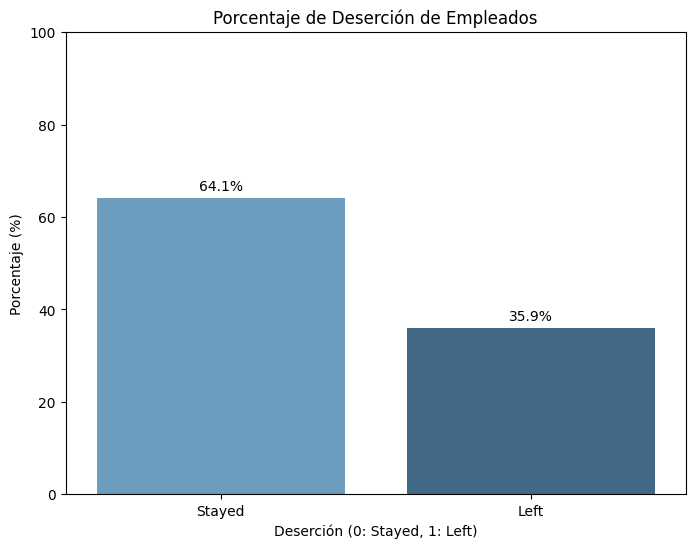

In [42]:
diccionario = {'Left' : 1 , 'Stayed' : 0}
binario = df2['Deserción'].map(diccionario)

desercion_counts = binario.value_counts(normalize=True) * 100  
desercion_porcentajes = desercion_counts.sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=desercion_porcentajes.index, y=desercion_porcentajes.values, palette="Blues_d")

plt.xlabel('Deserción (0: Stayed, 1: Left)')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de Deserción de Empleados')
plt.ylim(0, 100) 
plt.xticks([0, 1], ['Stayed', 'Left'])

for i, value in enumerate(desercion_porcentajes):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom')

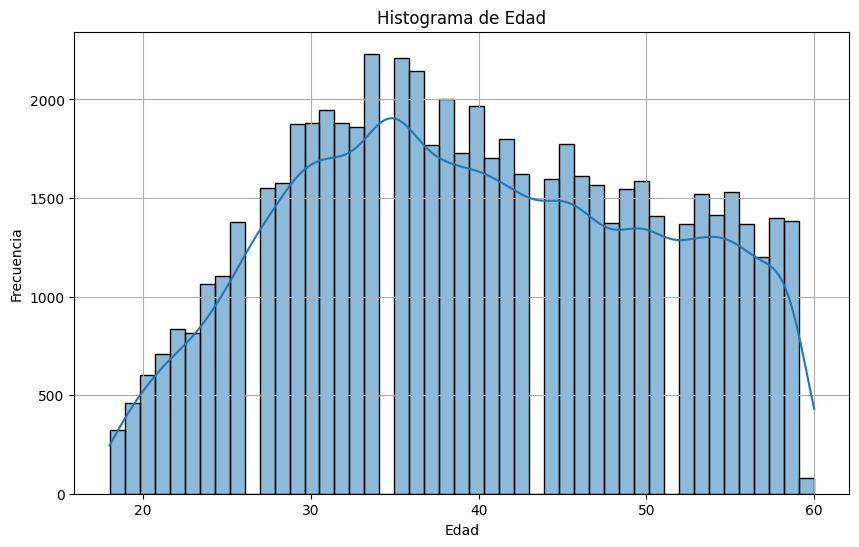

In [48]:
col= 'Edad'

plt.figure(figsize=(10, 6))
sns.histplot(x=col, data=df2, kde=True)
plt.title(f'Histograma de {col}')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

C:\Users\fchia\AppData\Local\Temp\ipykernel_19672\1662919165.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporciones = df2.groupby('Rangos de Edad')['binario'].mean() * 100
C:\Users\fchia\AppData\Local\Temp\ipykernel_19672\1662919165.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=proporciones.index, y=proporciones.values, ci=None, color="steelblue")


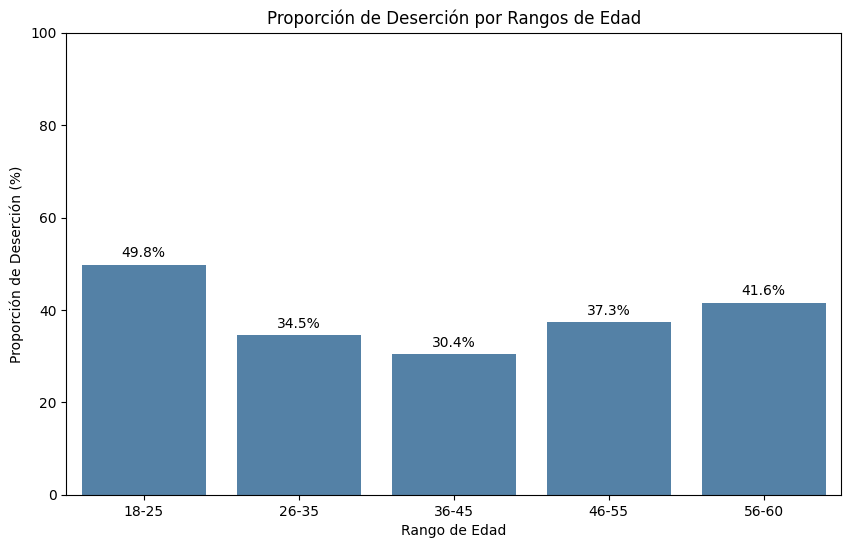

In [49]:
df2['binario'] = df2['Deserción'].map(diccionario)

bins = [18, 25, 35, 45, 55, 60]
rangos = ['18-25', '26-35', '36-45', '46-55', '56-60']
df2['Rangos de Edad'] = pd.cut(df2['Edad'], bins=bins, labels=rangos, right=False)

proporciones = df2.groupby('Rangos de Edad')['binario'].mean() * 100
desercion_porcentajes = proporciones.sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=proporciones.index, y=proporciones.values, ci=None, color="steelblue")

plt.title('Proporción de Deserción por Rangos de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Proporción de Deserción (%)')
plt.ylim(0, 100)

for i, value in enumerate(desercion_porcentajes):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom')
    
plt.show()

En el gráfico anterior se puede observar los Rango de Edad de los empleados y cuales son más propensos a desertar. Esto es de nuestro interes ya que en base a este análisis podremos detectar, junto a otras variables, a los empleados que abandonan las empresas. La Edad es una variable muy importante que nos brinda un gran filtro para la predicción. Sabemos que el 49,8% de las personas de entre 18 a 25 años son propensos a desertar, lo cual, nos da a entender que los jovenes son el grupo de empleados con más rotaciones en el mercado laboral. Los siguen los trabajadores de 56 a 60 años con un 41,6%, esto se puede ocacionar por retiros voluntarios previos a jubilaciones, ya sea para mujeres de 60 años en adelante o 55 años para trabajos insalubres. Luego la tendencia de los demás grupos de edad se mantienen entre el 30% al 38%, estas edades corresponden a aquellos que tienen un trabajo estable o que no consideran prudente renunciar para cambiar por otra empresa, buscan la estabilidad y la adquisición de años o estatus en una empresa. 

10- ¿La distancia a casa influye en los empleados que realizan trabajo remoto?

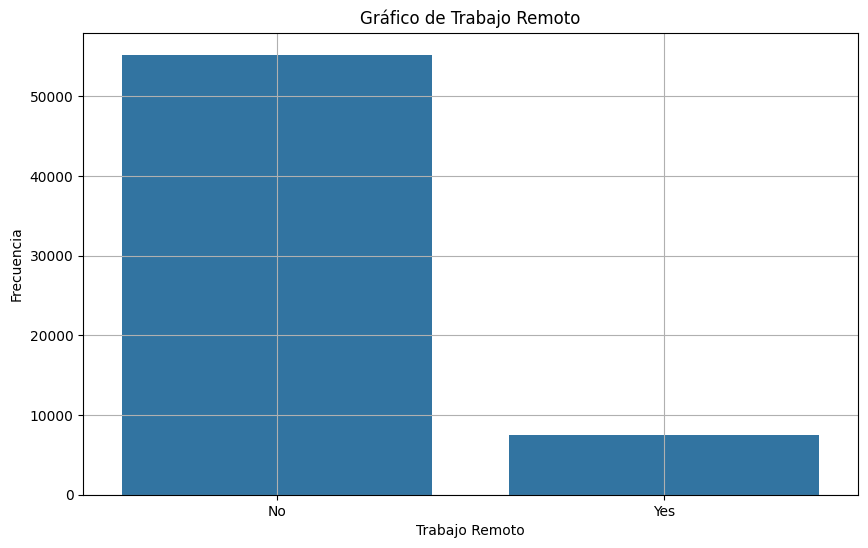

In [52]:
col= 'Trabajo Remoto'

plt.figure(figsize=(10, 6))
sns.countplot(x=col, data=df2)
plt.title(f'Gráfico de {col}')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

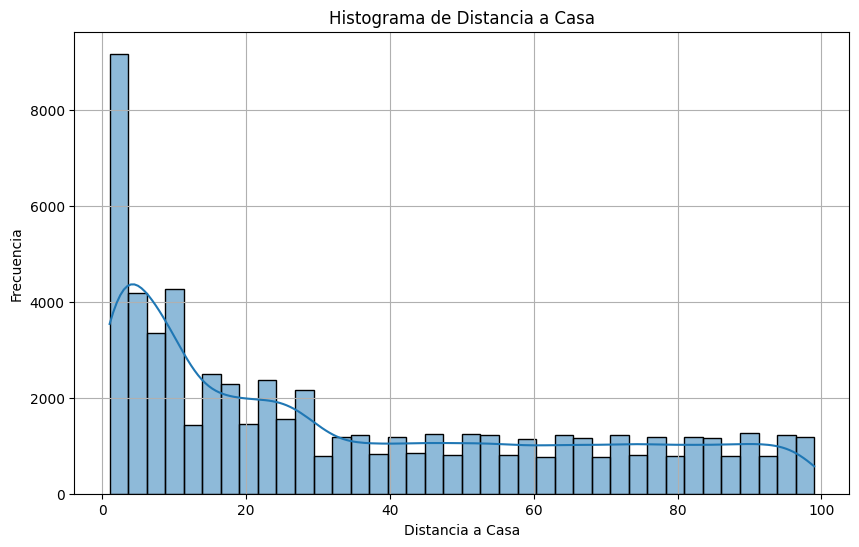

In [53]:
col = 'Distancia a Casa'

plt.figure(figsize=(10, 6))
sns.histplot(x=col, data=df2, kde=True)
plt.title(f'Histograma de {col}')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

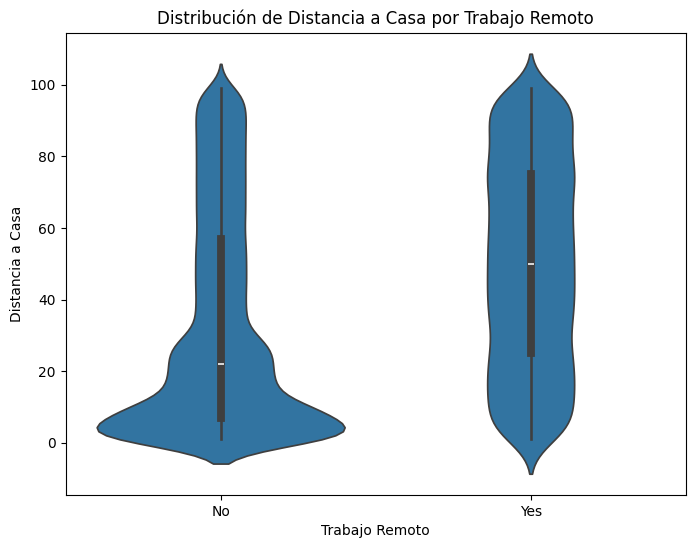

In [54]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Trabajo Remoto', y='Distancia a Casa', data=df2)
plt.title('Distribución de Distancia a Casa por Trabajo Remoto')
plt.xlabel('Trabajo Remoto')
plt.ylabel('Distancia a Casa')
plt.show()

En el gráfico de violín es un grafico muy similar al de caja, es este se puede apreciar que los empleados que trabajan de forma remota parecen vivir más lejos de su lugar de trabajo en promedio, ya que su mediana está más alta que la del grupo que no trabaja de forma remota. Los empleados que no trabajan de forma remota tienden a vivir más cerca, con la mayoría concentrados en distancias de hasta 20 km. Y por último, la distribución de la distancia a casa es más variada para aquellos que trabajan de forma remota, mientras que para los que no trabajan de forma remota, la mayoría de los empleados vive relativamente cerca.